
You build any either classification or regression model, where you should apply the below techniques and observe the performance,

1. Apply LDA

2. Perform PCA

3. Gridsearch & GridsearchCV

4. Randamized searchov

5. Feature scaling

6. Handling imbalance dataset

7. Apply cross validation

8. K-Fold Cross validation

9. LOOCV

Compare the results and report the inferences

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('winequality-red.xlsx')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

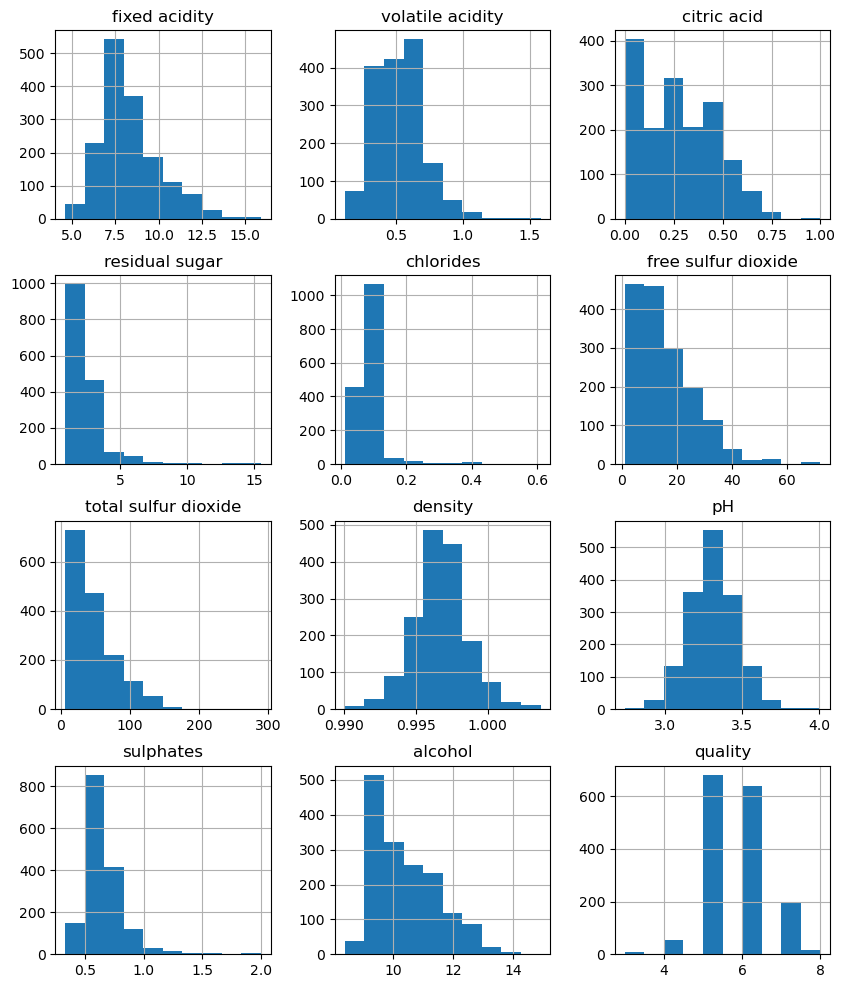

In [4]:
data.hist(figsize=(10,12))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (1199, 11)

Training data-y- Shape:	 (1199, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (400, 11)

Testing data(y-Outcome) Shape:	 (400, 1)


In [9]:
from sklearn.linear_model import LinearRegression
base_reg=LinearRegression()
print("*******Linear Regression*******")
print()
print("Training Started....\n")
base_reg.fit(xtrain,ytrain)
print()
base_pred=base_reg.predict(xtest)

from sklearn.metrics import r2_score
print("Base Train_score:\t",base_reg.score(xtrain,ytrain))
print()
print("Base Test Score: \t",base_reg.score(xtest,ytest))

*******Linear Regression*******

Training Started....


Base Train_score:	 0.3705714892325809

Base Test Score: 	 0.312492869444576


In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print("Mean Absolute Error: \t",mean_absolute_error(ytest,base_pred))
print()
print("Mean Squared Error: \t",mean_squared_error(ytest,base_pred))
print()
print("RMSE: \t",np.sqrt(mean_squared_error(ytest,base_pred)))
print()
print("Variance Score: \t",explained_variance_score(ytest,base_pred))
print()
print("R-Square: \t",r2_score(ytest,base_pred))

Mean Absolute Error: 	 0.5077605322252638

Mean Squared Error: 	 0.41525000993591005

RMSE: 	 0.6443989524633866

Variance Score: 	 0.3149078074108428

R-Square: 	 0.312492869444576


In [12]:
diff=ytest-base_pred
diff.head()

,quality
407,1.058690
1220,-0.240655
1200,0.570885
308,0.667614
1328,-0.195516


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming you have already loaded your dataset and labeled it appropriately
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(xtrain, ytrain)
X_test_lda = lda.transform(xtest)

# Fit a linear regression model on the reduced data
regression_model = LinearRegression()
regression_model.fit(X_train_lda, ytrain)

# Make predictions on the test set
y_pred = regression_model.predict(X_test_lda)

# Evaluate the regression model using mean squared error
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.41307621908902303


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(xtrain)
X_test_pca = pca.transform(xtest)

# Fit a linear regression model on the PCA-transformed data
regression_model_pca = LinearRegression()
regression_model_pca.fit(X_train_pca, ytrain)

# Make predictions on the test set
y_pred_pca = regression_model_pca.predict(X_test_pca)

# Evaluate the regression model using mean squared error
mse_pca = mean_squared_error(ytest, y_pred_pca)
print(f"Mean Squared Error (PCA): {mse_pca}")


Mean Squared Error (PCA): 0.5877956547697019


In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=regression_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the data
grid_search.fit(X_train_pca, ytrain)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_pca)

# Evaluate the regression model using mean squared error
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 0.5877956547697019


In [16]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'fit_intercept': [True, False],
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=regression_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,       # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Scoring metric
    random_state=42  # Seed for reproducibility
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train_pca, ytrain)

# Get the best hyperparameters from the random search
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model from the random search
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_pca)

# Evaluate the regression model using mean squared error
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 0.5877956547697019


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [17]:
from sklearn.preprocessing import StandardScaler
std_sc=StandardScaler()
sc_x=std_sc.fit_transform(x)

In [18]:
sc_x

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(sc_x,y,test_size=.25,random_state=12)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (1199, 11)

Training data-y- Shape:	 (1199, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (400, 11)

Testing data(y-Outcome) Shape:	 (400, 1)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('***Performance Measures for Logistic Regression Classification***')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)


Training the model

[LibLinear]Predicted Label for the input samples:
 [6 5 6 5 6 5 5 5 5 6 5 5 5 5 6 6 6 6 5 5 5 5 6 6 6 6 5 5 6 6 6 6 6 6 5 5 7
 5 6 6 5 5 6 6 5 6 6 7 6 7 5 5 6 5 6 5 6 6 5 6 6 6 6 5 6 6 6 6 5 5 5 6 6 6
 5 5 5 6 5 6 6 5 6 5 5 5 5 7 6 6 6 5 5 5 5 6 5 5 6 5 5 6 7 5 6 6 6 6 5 6 6
 6 6 6 6 5 5 5 7 5 6 6 6 6 5 5 6 4 6 6 6 6 5 6 6 5 5 5 5 7 5 5 6 6 5 6 5 7
 6 6 5 6 6 5 6 6 5 5 6 5 5 5 6 5 5 5 5 5 5 5 6 6 6 5 6 5 6 6 6 6 6 6 5 6 6
 6 6 5 5 5 5 5 5 5 5 5 6 5 5 6 6 5 5 5 6 6 6 6 5 5 5 6 6 6 5 5 6 5 5 5 6 6
 5 6 5 5 6 6 5 5 5 5 5 5 6 6 6 6 6 6 5 5 5 6 6 5 6 6 5 5 5 5 5 6 6 5 6 5 5
 5 5 6 5 5 5 6 6 5 5 6 5 6 6 5 5 6 5 6 5 5 5 5 6 5 6 5 5 6 6 6 6 6 6 5 5 7
 5 5 6 6 5 5 5 6 6 5 6 5 6 7 5 5 5 5 6 5 6 6 6 5 6 5 5 5 5 5 5 6 6 7 6 6 5
 5 5 6 6 5 5 6 6 6 5 5 5 6 6 6 6 5 5 6 6 5 5 5 6 6 6 6 6 5 5 5 6 6 5 5 6 5
 5 6 5 5 6 5 5 7 6 6 5 5 5 5 5 6 5 5 6 5 5 5 6 5 5 6 5 6 6 6]

Testing is completed

Testing samples are: 	 400
***Performance Measures for Logistic Regression Classification***
A

C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMet

In [21]:
from sklearn.preprocessing import MinMaxScaler
mm_sc=MinMaxScaler()
mm_x=mm_sc.fit_transform(x)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(mm_x,y,test_size=.25,random_state=12)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (1199, 11)

Training data-y- Shape:	 (1199, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (400, 11)

Testing data(y-Outcome) Shape:	 (400, 1)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
#Train the model
print('Training the model\n')
log_reg.fit(xtrain,ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))
print('***Performance Measures for Logistic Regression***')
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*80)


Training the model

[LibLinear]Predicted Label for the input samples:
 [6 5 6 5 6 5 5 5 5 6 5 5 5 5 6 6 6 6 5 5 5 5 6 6 6 6 5 5 6 6 6 6 6 6 5 5 6
 5 6 6 5 5 6 6 5 6 6 7 6 7 5 5 6 5 6 5 6 6 5 6 6 6 6 5 6 6 5 6 5 5 5 6 6 6
 5 5 5 6 5 6 6 5 6 5 5 5 5 6 6 6 5 5 5 5 5 6 5 5 6 5 5 6 6 5 6 6 6 6 5 5 6
 6 6 6 6 5 5 5 6 5 6 6 6 6 5 5 6 5 6 6 6 6 5 6 6 5 5 5 5 6 5 5 6 6 5 6 5 7
 6 6 5 6 6 5 6 6 5 5 6 5 5 5 6 5 5 5 5 5 5 5 6 6 6 5 6 5 6 6 6 6 6 6 5 6 6
 6 6 5 5 5 5 5 5 5 5 5 6 5 5 5 6 5 5 5 6 6 6 6 5 5 5 6 6 6 5 5 6 5 5 6 6 6
 5 6 5 5 6 5 5 5 5 5 5 5 6 6 6 6 6 6 5 5 5 6 6 5 6 6 5 5 5 5 5 6 6 5 6 5 5
 5 5 6 5 5 5 6 6 5 5 6 5 6 6 5 5 6 5 6 5 5 5 5 6 5 6 5 5 5 6 6 5 6 6 5 5 7
 5 5 6 6 5 5 5 6 6 5 6 5 6 6 6 5 5 5 6 5 6 6 6 5 6 5 5 5 5 6 5 6 6 6 6 6 5
 5 5 6 6 5 5 6 6 6 5 5 5 6 6 6 6 5 5 6 6 5 5 5 6 6 5 6 5 5 5 5 6 6 5 5 6 5
 5 6 5 5 6 5 5 6 6 6 5 5 5 5 5 6 5 6 6 5 5 5 6 5 5 6 5 6 6 6]

Testing is completed

Testing samples are: 	 400
***Performance Measures for Logistic Regression***
Accuracy Score:	

C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMet

# Feature Engineering Techniques - Handling the imbalance data

<Axes: ylabel='count'>

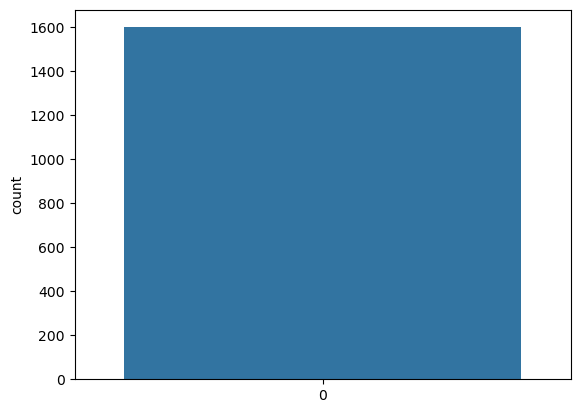

In [25]:
sns.countplot(data['quality'])

In [26]:
#Data Imbalance
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [36]:
from sklearn.utils import resample
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame 'data' containing the 'quality' column
# and other relevant features

df_majority = data[data['quality'] == 'medium']
df_minority = data[data['quality'] == 'high']

print('Majority length:\t', len(df_majority))
print('Minority Length:\t', len(df_minority))
print('=' * 100)

# Upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=500, random_state=12)

# Concatenate the upsampled minority class with the majority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print(df_upsampled.shape)

# Create a countplot
sns.countplot(data=df_upsampled, x='quality')


Majority length:	 0
Minority Length:	 0


ValueError: high <= 0

In [35]:
from sklearn.utils import resample
df_majority=data[data['quality']=='medium']
df_minority=data[data['quality']=='high']
print('Majority lenght:\t',len(df_majority))
print()
print('Minority Length:\t',len(df_minority))
print('='*100)
#Upsample
df_minority_upsampled=resample(df_minority,replace=True,  n_samples=500, random_state=12)
df_upsampled=pd.concat([df_majority,df_minority_upsampled])
print(df_upsampled.shape)
print()
print(sns.countplot(df_upsampled['quality']))

Majority lenght:	 0

Minority Length:	 0


ValueError: high <= 0

In [27]:
import pandas as pd
from sklearn.utils import resample

# Assuming df is your original DataFrame
# Assuming 'quality_category' is your target column
df_majority = data[data['quality'] == 'medium']
df_minority_high = data[data['quality'] == 'high']  # Adjust based on your minority class

print('Majority length (medium):\t', len(df_majority))
print('Minority length (high):\t', len(df_minority_high))
print()

# Upsample the minority class 'high'
df_minority_high_upsampled = resample(df_minority_high, replace=True, n_samples=500, random_state=12)

# Upsample the minority class 'medium' (adjust n_samples as needed)
df_minority_medium = data[data['quality'] == 'medium']
df_minority_medium_upsampled = resample(df_minority_medium, replace=True, n_samples=500, random_state=12)

# Concatenate the majority class and the upsampled minority classes
df_upsampled = pd.concat([df_majority, df_minority_high_upsampled, df_minority_medium_upsampled])

# Display the updated distribution
print(df_upsampled['quality'].value_counts())


Majority length (medium):	 0
Minority length (high):	 0



ValueError: high <= 0

In [52]:
data.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     6          4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     6          4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     7          4
               0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     5          4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5      5          3
                     

In [55]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

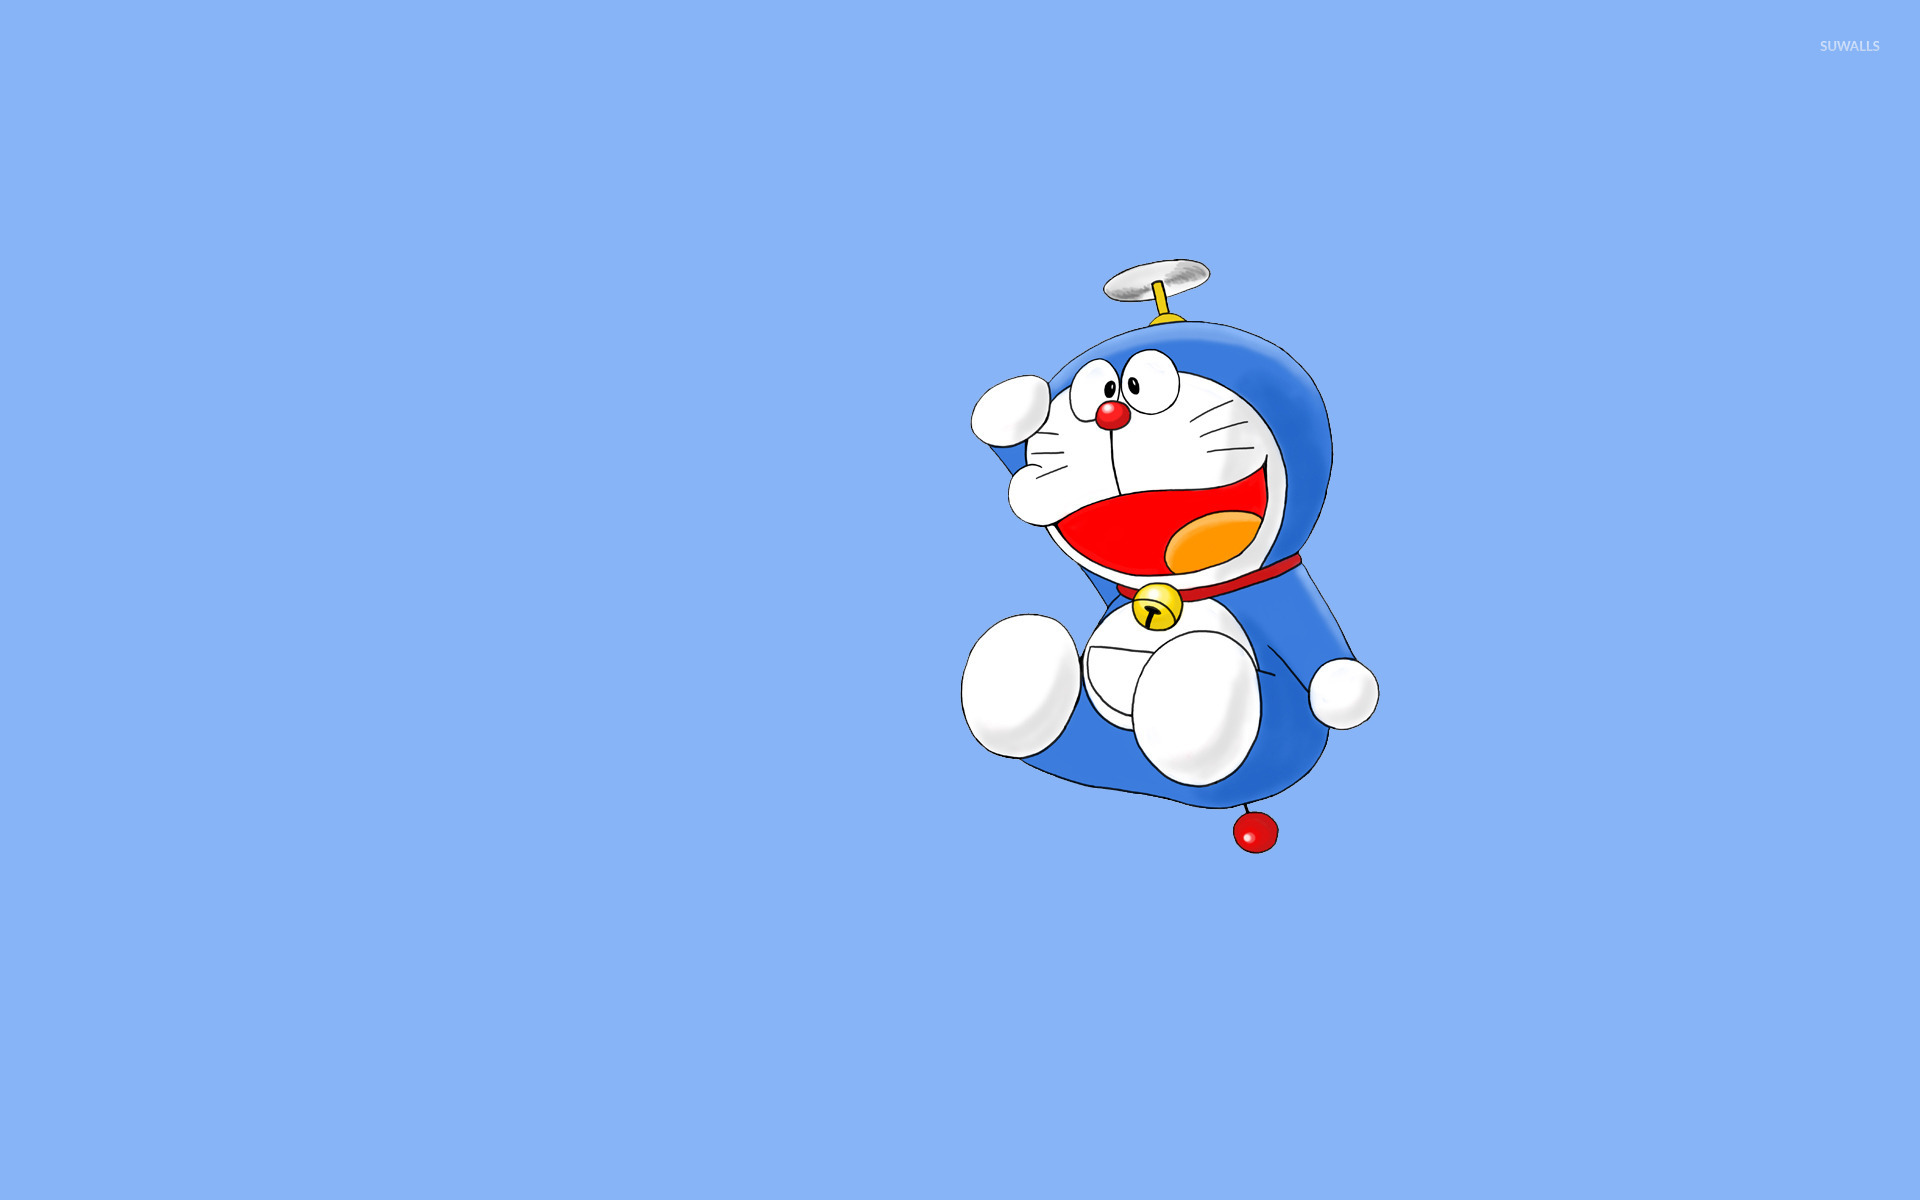

In [2]:
Image(filename='doremon.jpg', width=500) 

In [1]:
from IPython.display import Image